# Column Generation Real


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from exputils.extent.cg import calculate_extent_CG
from exputils.state.random_ket import make_random_quantum_state

In [2]:
sns.set_theme("paper")
color_table = plt.rcParams["axes.prop_cycle"].by_key()["color"]
rc = {
    "mathtext.fontset": "stix",
    "font.size": 20,
    "font.family": "Times New Roman",
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "legend.fontsize": 15,
    "text.usetex": True,
    "text.latex.preamble": "\\usepackage{amsmath}",
}
plt.rcParams.update(rc)


def visualize_CG(n, kind):
    log_file_name = f"../data/CG_real/{kind}_{n}_data.txt"

    extends = []
    max_values = []
    with open(log_file_name, mode="r") as f:
        lines = f.readlines()
        for line in lines:
            extend, max_value = map(float, line.split())
            extends.append(extend)
            max_values.append(max_value)

    plt.figure(figsize=(12, 5))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    sns.lineplot(x=list(range(len(extends))), y=extends, ax=ax1, marker="o")
    ax1.set_xlabel("Iterations $k$", fontsize=30)
    ax1.set_ylabel(r"$\hat{\xi}_k(\psi)$", fontsize=30)
    ax1.set_xticks(list(range(len(extends))))
    sns.lineplot(x=list(range(len(max_values))), y=max_values, ax=ax2, marker="o")
    ax2.set_xlabel("Iterations $k$", fontsize=30)
    ax2.set_ylabel("$\max \\lvert a_j^\dagger y_k \\rvert$", fontsize=30)
    ax2.set_xticks(list(range(len(max_values))))

    ax1.set_title("(a)", fontsize=25, x=-0.07, y=1.05)
    ax2.set_title("(b)", fontsize=25, x=-0.07, y=1.05)

    plt.tight_layout()
    plt.savefig(f"../image/CG_real_{n}.pdf", bbox_inches="tight")
    plt.show()

In [3]:
import time

seed = 0
kind = "real"

for n in range(5, 10 + 1):
    print(f"{n=}")

    psi = make_random_quantum_state(kind, n, seed)
    assert np.isclose(np.linalg.norm(psi), 1.0)

    t0 = time.perf_counter()
    stabilizer_extent, extends, max_values, _ = calculate_extent_CG(n, psi)
    t1 = time.perf_counter()
    print(f"{stabilizer_extent=} {t1-t0=}")

    with open(f"../data/CG_real/{kind}_{n}_data.txt", mode="w") as f:
        for i in range(len(extends)):
            print(f"{extends[i]} {max_values[i]}", file=f)

    with open(f"../data/CG_real/{kind}_{n}_time.txt", mode="w") as f:
        print(t1 - t0, file=f)

n=5
CG: n=5, method='mosek'
start: calculate dots
[k|progress|range]: 1 | 2.01600e+03/2.42352e+06 | [0.00050, 0.41374] | 13[ms]
[k|progress|range]: 2 | 4.16960e+04/2.42352e+06 | [0.00348, 0.54296] | 20[ms]
[k|progress|range]: 3 | 3.59136e+05/2.42352e+06 | [0.30059, 0.63275] | 25[ms]
[k|progress|range]: 4 | 1.37494e+06/2.42352e+06 | [0.37843, 0.70530] | 29[ms]
[k|progress|range]: 5 | 2.42352e+06/2.42352e+06 | [0.37843, 0.71864] | 33[ms]
 calculation time : 33[ms]
iteration: 1 / 30, Amat.shape = (32, 1000)
start: solve SOCP
stabilizer_extent=2.6362151150982696
start: calculate dual dots
[k|progress|range]: 1 | 2.01600e+03/2.42352e+06 | [nan, nan] | 7[ms]
[k|progress|range]: 2 | 4.16960e+04/2.42352e+06 | [nan, nan] | 12[ms]
[k|progress|range]: 3 | 3.59136e+05/2.42352e+06 | [0.97762, 1.00000] | 15[ms]
[k|progress|range]: 4 | 1.37494e+06/2.42352e+06 | [0.97119, 1.00000] | 19[ms]
[k|progress|range]: 5 | 2.42352e+06/2.42352e+06 | [0.97119, 1.00000] | 24[ms]
 calculation time : 24[ms]
# of vio

4.721624827550517


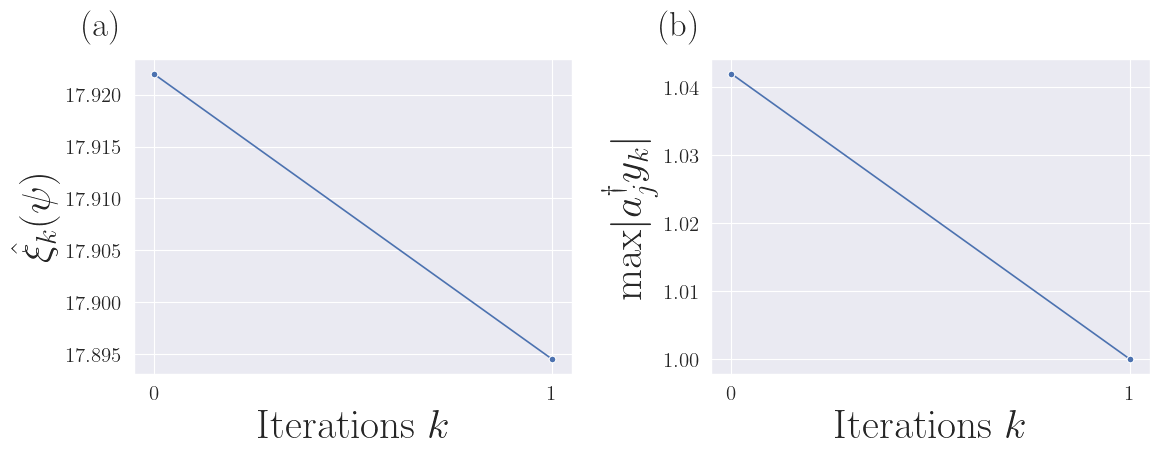

In [3]:
kind = "real"
n = 10

with open(f"../data/CG_real/{kind}_{n}_time.txt") as f:
    print(f"{float(f.read())/3600}")

visualize_CG(n, "real")